In [13]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.activations import leaky_relu 
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [14]:
model = Sequential()

model.add(Conv2D(198, (3,3), input_shape=(227,227,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(357, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 225, 225, 198)     1980      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 198)    0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 110, 110, 357)     636531    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 357)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1079925)           0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [16]:
train_dir="/notebooks/thermograms/Desenvolvimento da Metodologia"
validation_dir=train_dir
batch_size=16
test_train_split=0.2
train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=(227,227) ,\
      subset='training',seed=12, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=(227,227), subset='validation',seed=12,\
      validation_split=test_train_split,batch_size=batch_size)

Found 1282 files belonging to 2 classes.
Using 1026 files for training.
Found 1282 files belonging to 2 classes.
Using 256 files for validation.


In [17]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [18]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [19]:
history = model.fit(train_data,
            epochs=100,
            validation_data=validation_data)#,callbacks=[callback])

Epoch 1/100
65/65 [==============================] - 6s 79ms/step - loss: 436.3128 - binary_accuracy: 0.6647 - val_loss: 0.7524 - val_binary_accuracy: 0.6172
Epoch 2/100
65/65 [==============================] - 5s 79ms/step - loss: 0.9236 - binary_accuracy: 0.6023 - val_loss: 0.5140 - val_binary_accuracy: 0.6250
Epoch 3/100
65/65 [==============================] - 5s 78ms/step - loss: 0.5732 - binary_accuracy: 0.6033 - val_loss: 3.7654 - val_binary_accuracy: 0.6328
Epoch 4/100
65/65 [==============================] - 5s 80ms/step - loss: 0.9559 - binary_accuracy: 0.6072 - val_loss: 0.6539 - val_binary_accuracy: 0.6680
Epoch 5/100
65/65 [==============================] - 5s 79ms/step - loss: 0.5856 - binary_accuracy: 0.6023 - val_loss: 0.5403 - val_binary_accuracy: 0.5938
Epoch 6/100
65/65 [==============================] - 5s 79ms/step - loss: 0.7575 - binary_accuracy: 0.5634 - val_loss: 0.5501 - val_binary_accuracy: 0.5820
Epoch 7/100
65/65 [==============================] - 5s 80ms/s

KeyboardInterrupt: 

In [20]:
epochs_run=len(history.epoch)

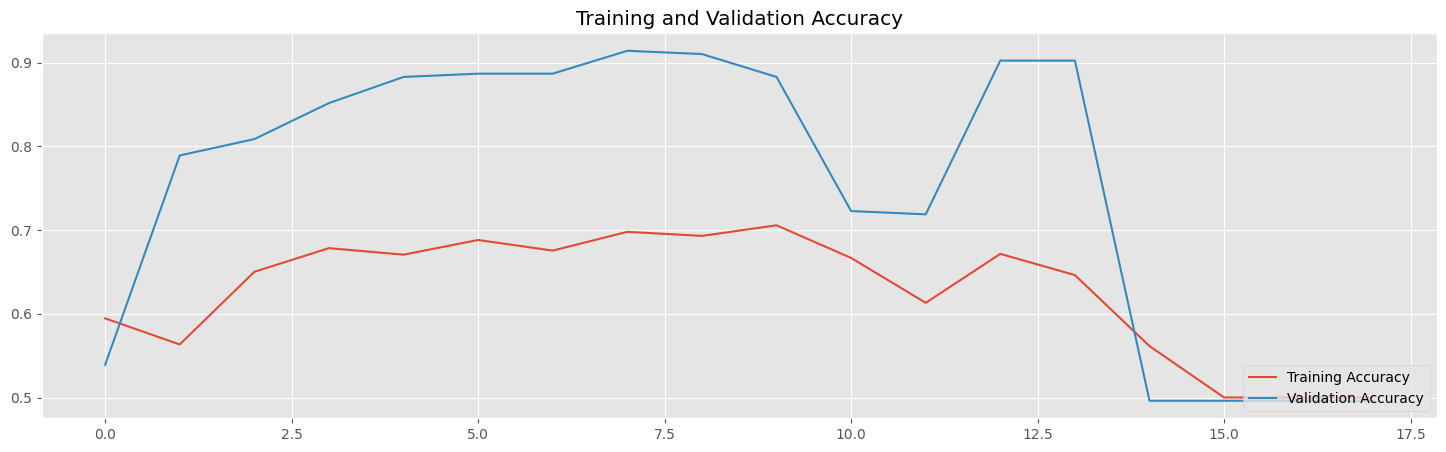

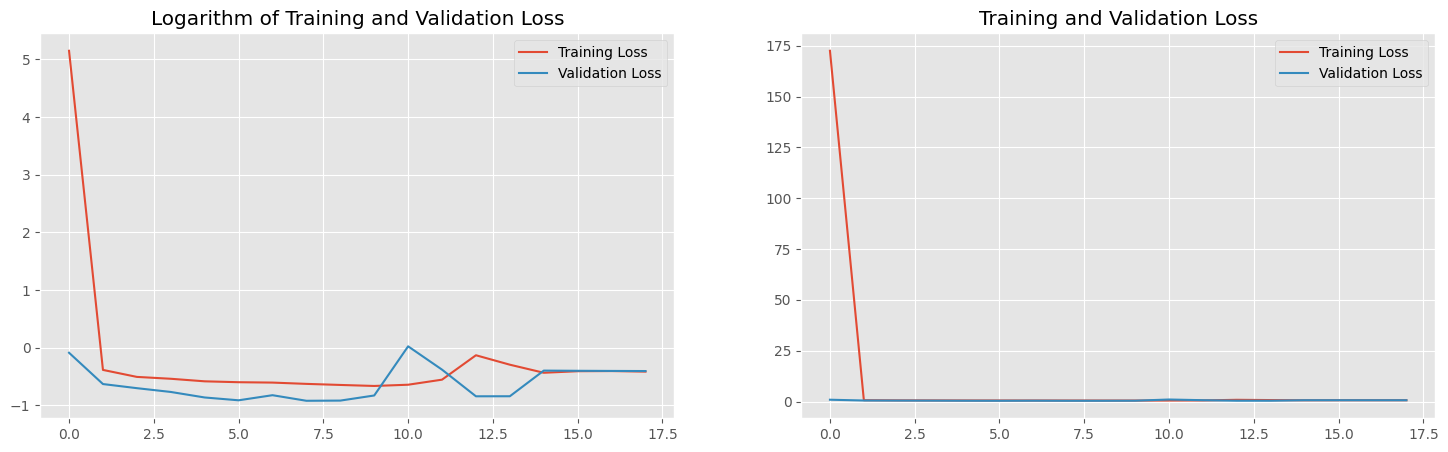

In [21]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()
